## 단순 회귀분석 Review

In [17]:
# 데이터 구성 패키지
import pandas as pd
# 데이터 행렬 연산 패키지
import numpy as np
# 데이터 시각화를 위한 패키지
import matplotlib.pyplot as plt
# 시각화 패키지
import seaborn as sns
# 통계분석 패키지
import scipy.stats as stats
# 선형 모델 패키지(절편 추가 위함)
import statsmodels.api as sm
# 회귀분석 패키지
from statsmodels.formula.api import ols
# 평가함수 패키지
from statsmodels.tools.eval_measures import rmse
# jupyter notebook 사용시 그래프 자동 출력 옵션
%matplotlib inline

In [4]:
ds_repair = pd.read_excel('./실습파일/빅데이터분석.xlsx', sheet_name = "부품수리시간")
ds_repair

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74
5,5,87
6,6,96
7,6,97
8,7,109
9,8,119


,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


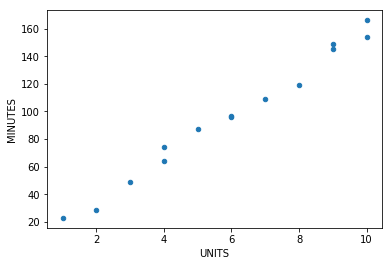

In [5]:
ds_repair.plot.scatter(x='UNITS',y='MINUTES')
ds_repair.corr(method="pearson").round(3)

In [10]:
ds_repair_x = ds_repair["UNITS"]
print(ds_repair_x)
ds_repair_y = ds_repair["MINUTES"]
ds_repair_x_const = sm.add_constant(ds_repair_x)
reg_model = sm.OLS(ds_repair_y,ds_repair_x_const)
reg_results = reg_model.fit()
print(reg_results.summary())

0      1
1      2
2      3
3      4
4      4
5      5
6      6
7      6
8      7
9      8
10     9
11     9
12    10
13    10
Name: UNITS, dtype: int64
                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           8.92e-13
Time:                        09:44:38   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|    

/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


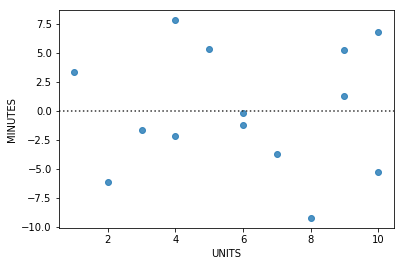

In [7]:
sns.residplot(ds_repair_x,ds_repair_y)

In [9]:
res = pd.DataFrame(reg_results.resid)
res

,0
0,3.329574
1,-6.179198
2,-1.687970
3,-2.196742
4,7.803258
5,5.294486
6,-1.214286
7,-0.214286
8,-3.723058
9,-9.231830


0     3.329574
1    -6.179198
2    -1.687970
3    -2.196742
4     7.803258
5     5.294486
6    -1.214286
7    -0.214286
8    -3.723058
9    -9.231830
10    5.259398
11    1.259398
12   -5.249373
13    6.750627
dtype: float64
-4.567774729886359e-15
4.991767300317869


((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([-1.84941104, -1.23787781, -1.0516062 , -0.74583958, -0.44007297,
         -0.33815076, -0.24325768, -0.04292783,  0.25229511,  0.66701305,
          1.05361452,  1.06064364,  1.35235201,  1.56322554])),
 (1.0993056983576026, 3.172065784643304e-17, 0.9900152558575118))

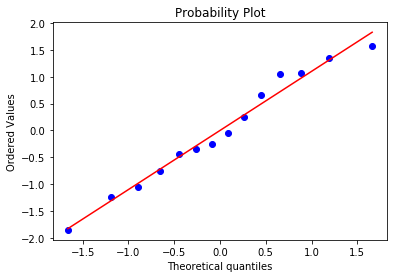

In [22]:
# 정규화
obs = reg_results.resid # observations row 데이터들 모아놓은 것을 의미함./회귀잔차 보는 것
print(obs)
print(np.mean(obs))
print(np.std(obs))
z = (obs-np.mean(obs))/np.std(obs)
# 정규확률도
stats.probplot(z,dist='norm',plot=plt)

## 다중 회귀분석

In [19]:
# 다중공선성 패키지 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor
# sklearn 선형회귀 모형 -> 변수 선택법을 위함
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진 제거법)
from sklearn.feature_selection import RFE
# 데이터 scale
from sklearn.preprocessing import scale

In [23]:
ds_health = pd.read_excel('./실습파일/빅데이터분석.xlsx', sheet_name = "체질검사")
ds_health.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,DATA
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,Training
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,Validation
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,Validation
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,Training
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,Validation


In [86]:
ds_health_y = ds_health["FAT"]
ds_health_x = ds_health.drop(["FAT","DATA"], axis = 1, inplace = False) # inplace 자체 default값이 False라 없이도 작동함.
print("목표변수 데이터 크기: {}".format(ds_health_y.shape))
print('설명변수 데이터 크기: {}'.format(ds_health_x.shape))

목표변수 데이터 크기: (252,)
설명변수 데이터 크기: (252, 13)


In [104]:
ds_health_x_const = sm.add_constant(ds_health_x)
ds_health_x_const.head()

,const,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,1.0,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,1.0,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,1.0,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,1.0,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,1.0,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


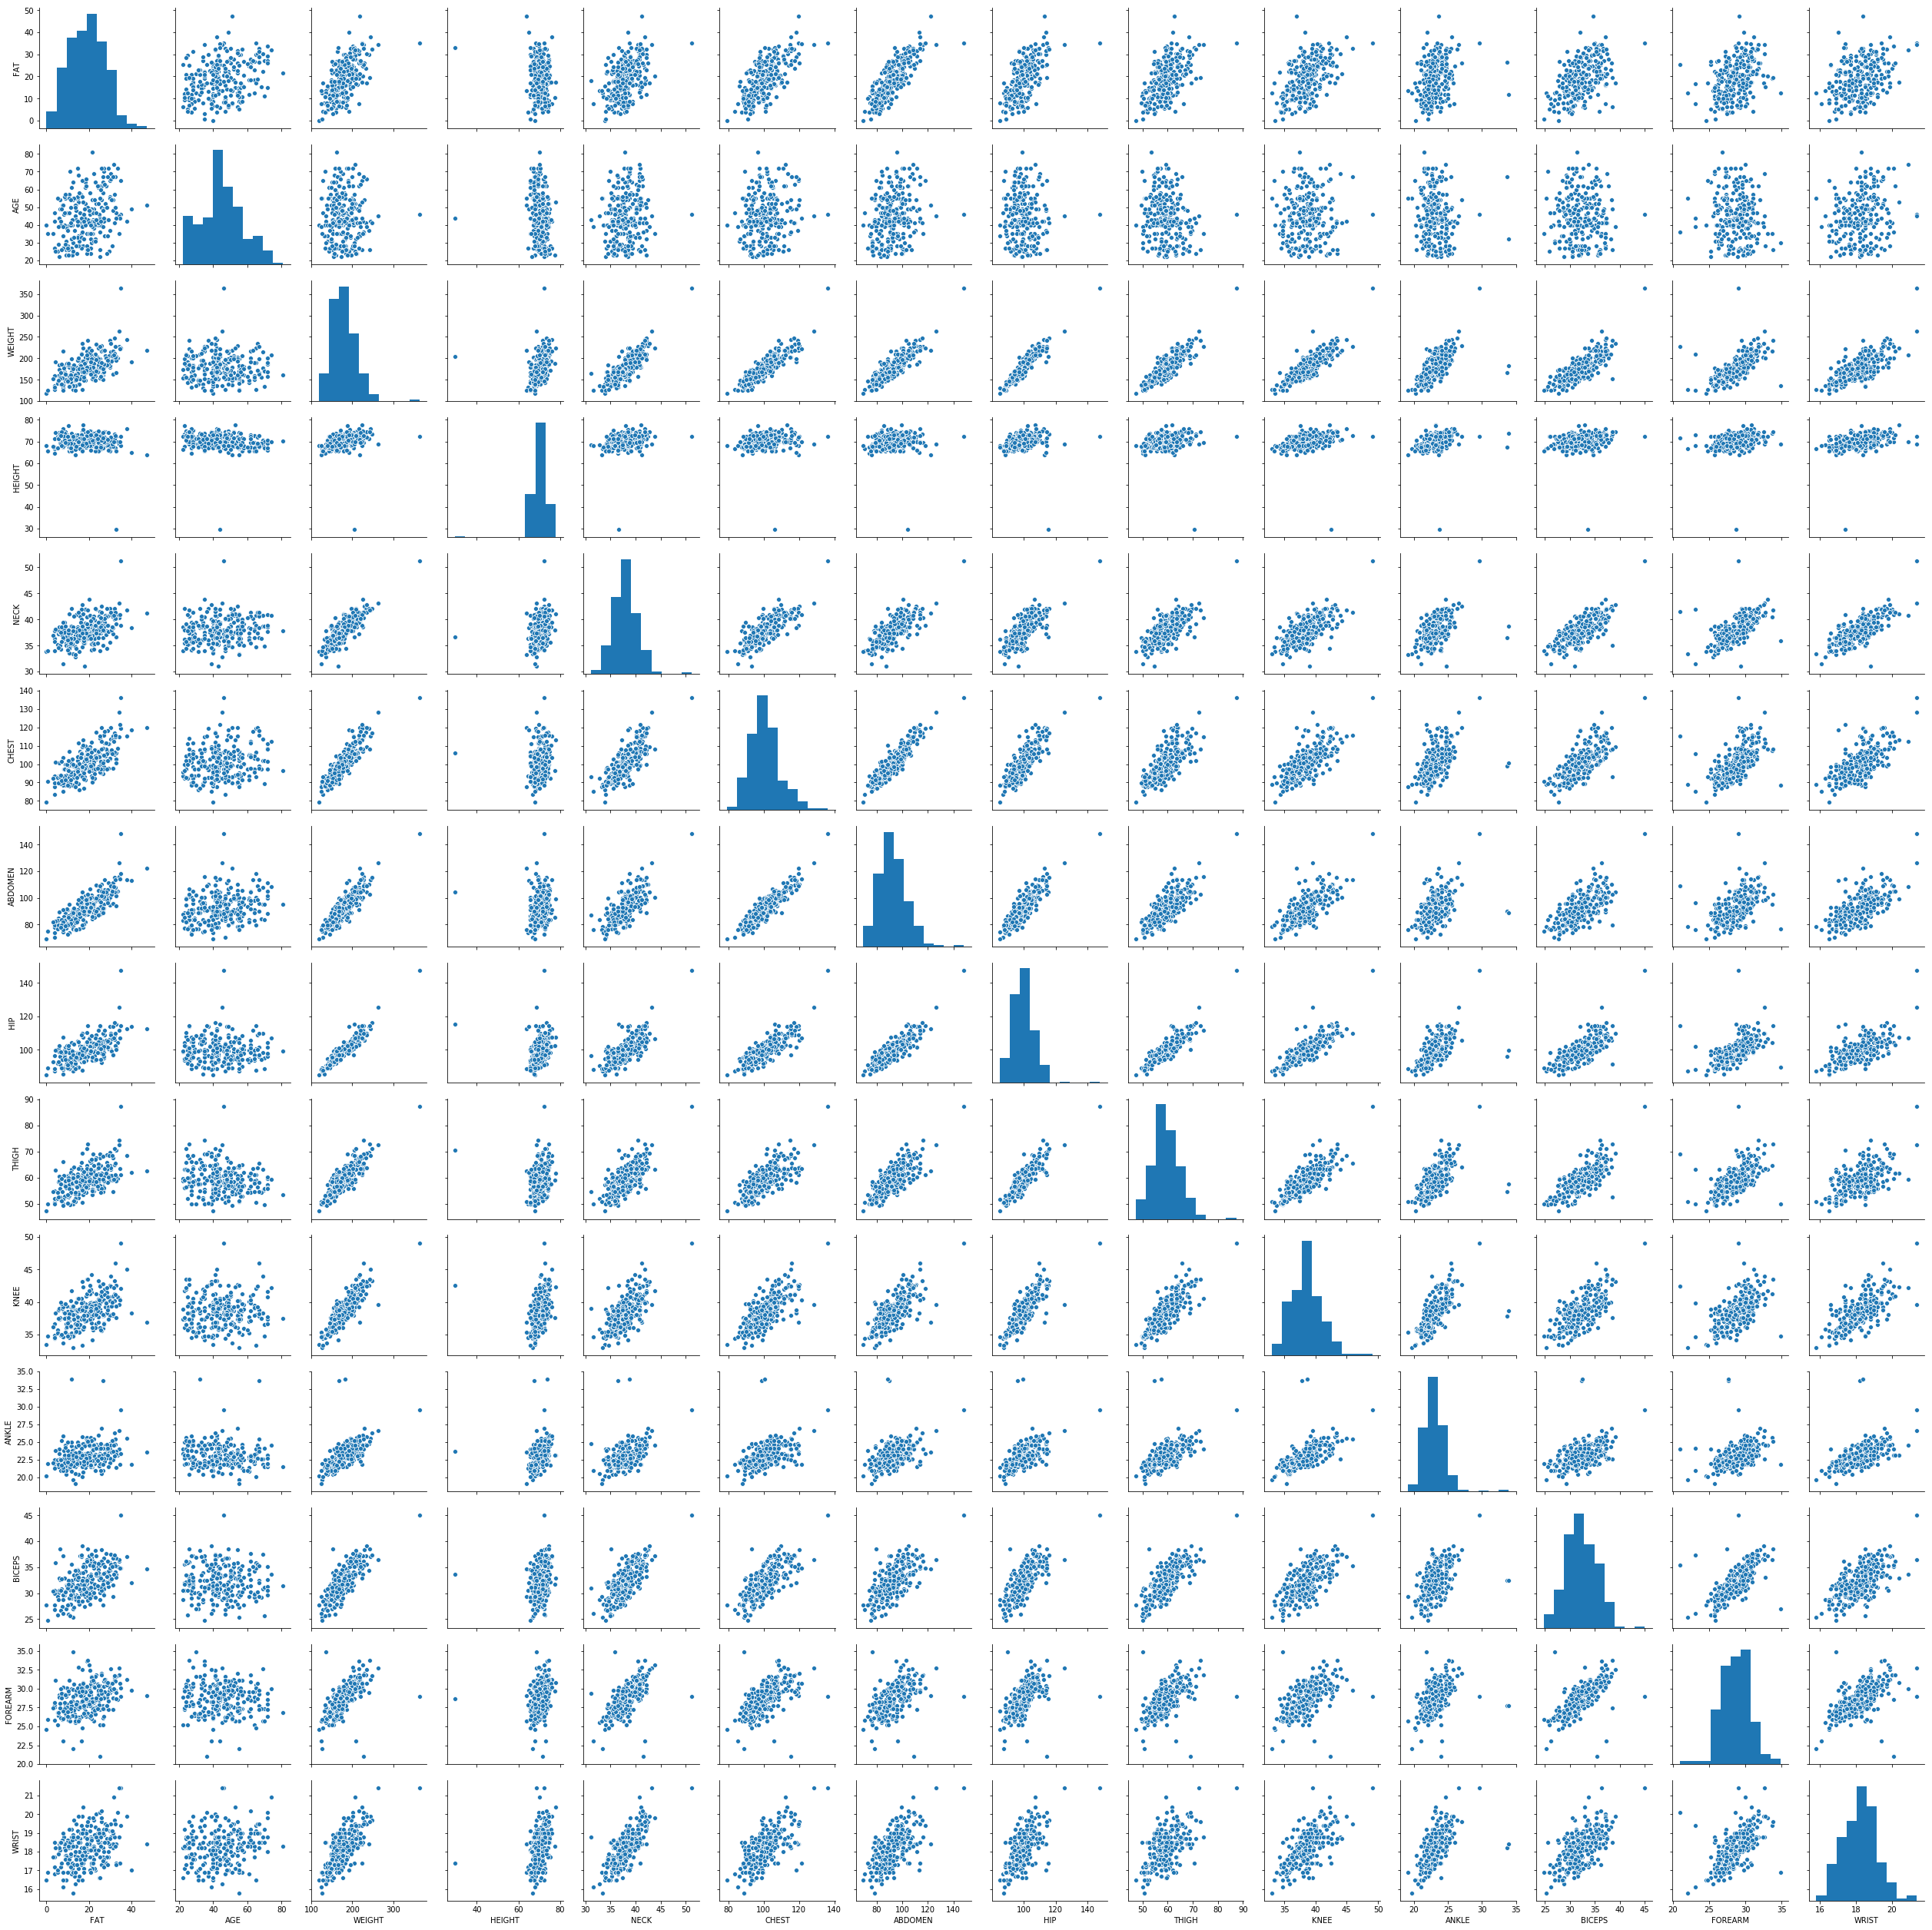

In [70]:
sns.pairplot(ds_health)

In [71]:
ds_health.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665


In [72]:
reg_multi_model = sm.OLS(ds_health_y, ds_health_x_const)
reg_multi_results = reg_multi_model.fit()
print(reg_multi_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     58.55
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           3.75e-64
Time:                        13:52:06   Log-Likelihood:                -719.69
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     239   BIC:                             1511.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5453      7.672      0.984      0.3

In [55]:
ds_vif = pd.DataFrame()
ds_vif["variable"] = ds_health_x_const.columns
#Pandas 내에서 사용할 수 있는 for 문 문법
ds_vif["VIF"] = [variance_inflation_factor(ds_health_x_const.values,i) for i in range(ds_health_x_const.shape[1])]
print(ds_health_x_const.shape)
print(ds_health_x_const.shape[1])
ds_vif.sort_values("VIF",inplace = True)
ds_vif.round(3)Week4_Wed

(252, 14)
14


,variable,VIF
3,HEIGHT,1.675
10,ANKLE,1.908
12,FOREARM,2.192
1,AGE,2.250
13,WRIST,3.378
11,BICEPS,3.620
4,NECK,4.324
9,KNEE,4.612
8,THIGH,7.778
5,CHEST,9.461


In [47]:
#Pandas 내에서 사용할 수 있는 for 문 문법
a = pd.DataFrame()
a["Hello"] = [i for i in range(5)]
a

,Hello
0,0
1,1
2,2
3,3
4,4


In [56]:
# RFE(recursive feature elimination)함수: 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
# sklearn의 선형회귀 모델
model = LinearRegression()
# 전체의 변수 중 5개의 변수가 남을 때까지 변수 제거
rfe = RFE(estimator=model,n_features_to_select=5).fit(ds_health_x,ds_health_y)
# 선택된 변수
selected_cols = ds_health_x.columns[rfe.support_]

# 제거된 변수
removed_cols = ds_health_x.columns[~rfe.support_]
print("Selected Variables: {}".format(selected_cols))
print("Removed Variables: {}".format(removed_cols))

Selected Variables: Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables: Index(['AGE', 'WEIGHT', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


In [100]:
ds_health_x_rfe = sm.add_constant(ds_health_x_const[selected_cols])
reg_multi_rfe_model = sm.OLS(ds_health_y,ds_health_x_rfe)
reg_multi_rfe_results = reg_multi_rfe_model.fit()
print(reg_multi_rfe_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           4.38e-68
Time:                        14:53:02   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7037      6.231      0.434      0.6

In [58]:
ds_rfe_vif = pd.DataFrame()
ds_rfe_vif["variable"] = ds_health_x_rfe.columns
ds_rfe_vif["VIF"] = [variance_inflation_factor(ds_health_x_rfe.values,i)for i in range(ds_health_x_rfe.shape[1])]
ds_rfe_vif.sort_values("VIF",inplace = True)
ds_rfe_vif.round(3)

,variable,VIF
4,FOREARM,1.769
5,WRIST,2.430
1,NECK,3.565
3,HIP,4.662
2,ABDOMEN,4.818
0,const,509.235


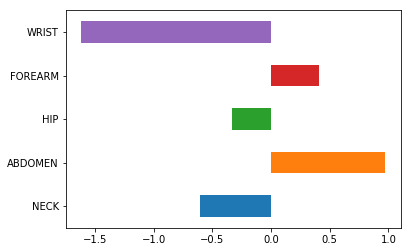

In [59]:
# 설명변수 중요도(표준화 적용 이전)
ds_reg_coef = pd.DataFrame({"Coef":reg_multi_rfe_results.params.values[1:]},index = reg_multi_rfe_model.exog_names[1:])
ds_reg_coef.plot.barh(y = "Coef",legend = False)

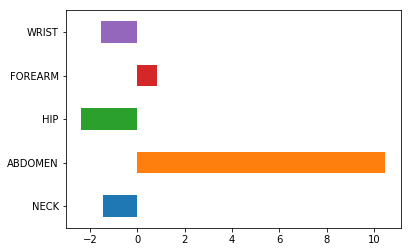

In [61]:
# 데이터 표준화, 평균 0, 표준편차 1
ds_health_x_scaled = scale(ds_health_x_const[selected_cols])
# 후진제거법에 의하여 선택된 데이터에 상수 1 입력
ds_health_x_scaled = sm.add_constant(ds_health_x_scaled)
# 회귀 모델 생성
reg_multi_scaled_model = sm.OLS(ds_health_y,ds_health_x_scaled)
# 적합
reg_multi_scaled_results = reg_multi_scaled_model.fit()
# 설명변수 중요도
ds_reg_scaled_coef = pd.DataFrame({"Coef":reg_multi_scaled_results.params.values[1:]}, index = reg_multi_rfe_model.exog_names[1:])
ds_reg_scaled_coef.plot.barh(y = "Coef", legend = False)

In [102]:
# 설명변수 중요도
import statsmodels.formula.api as smf
# 목표변수: FAT, 설명변수: NECK, ABDOMEN, FOREARM, WRIST
formula_model = smf.ols(formula = 'FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST', data = ds_health)
formula_result = formula_model.fit()
print(formula_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           4.38e-68
Time:                        14:53:32   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

In [93]:
ds_health2_y = ds_health["FAT"]
ds_health2_x = ds_health.drop(["FAT","DATA","WEIGHT"], axis = 1, inplace = False) # inplace 자체 default값이 False라 없이도 작동함.
print("목표변수 데이터 크기: {}".format(ds_health2_y.shape))
print('설명변수 데이터 크기: {}'.format(ds_health2_x.shape))

목표변수 데이터 크기: (252,)
설명변수 데이터 크기: (252, 12)


In [94]:
ds_health2_x_const = sm.add_constant(ds_health2_x)
ds_health2_x_const.head()

,const,AGE,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,1.0,46,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,1.0,27,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,1.0,69,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,1.0,57,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,1.0,51,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


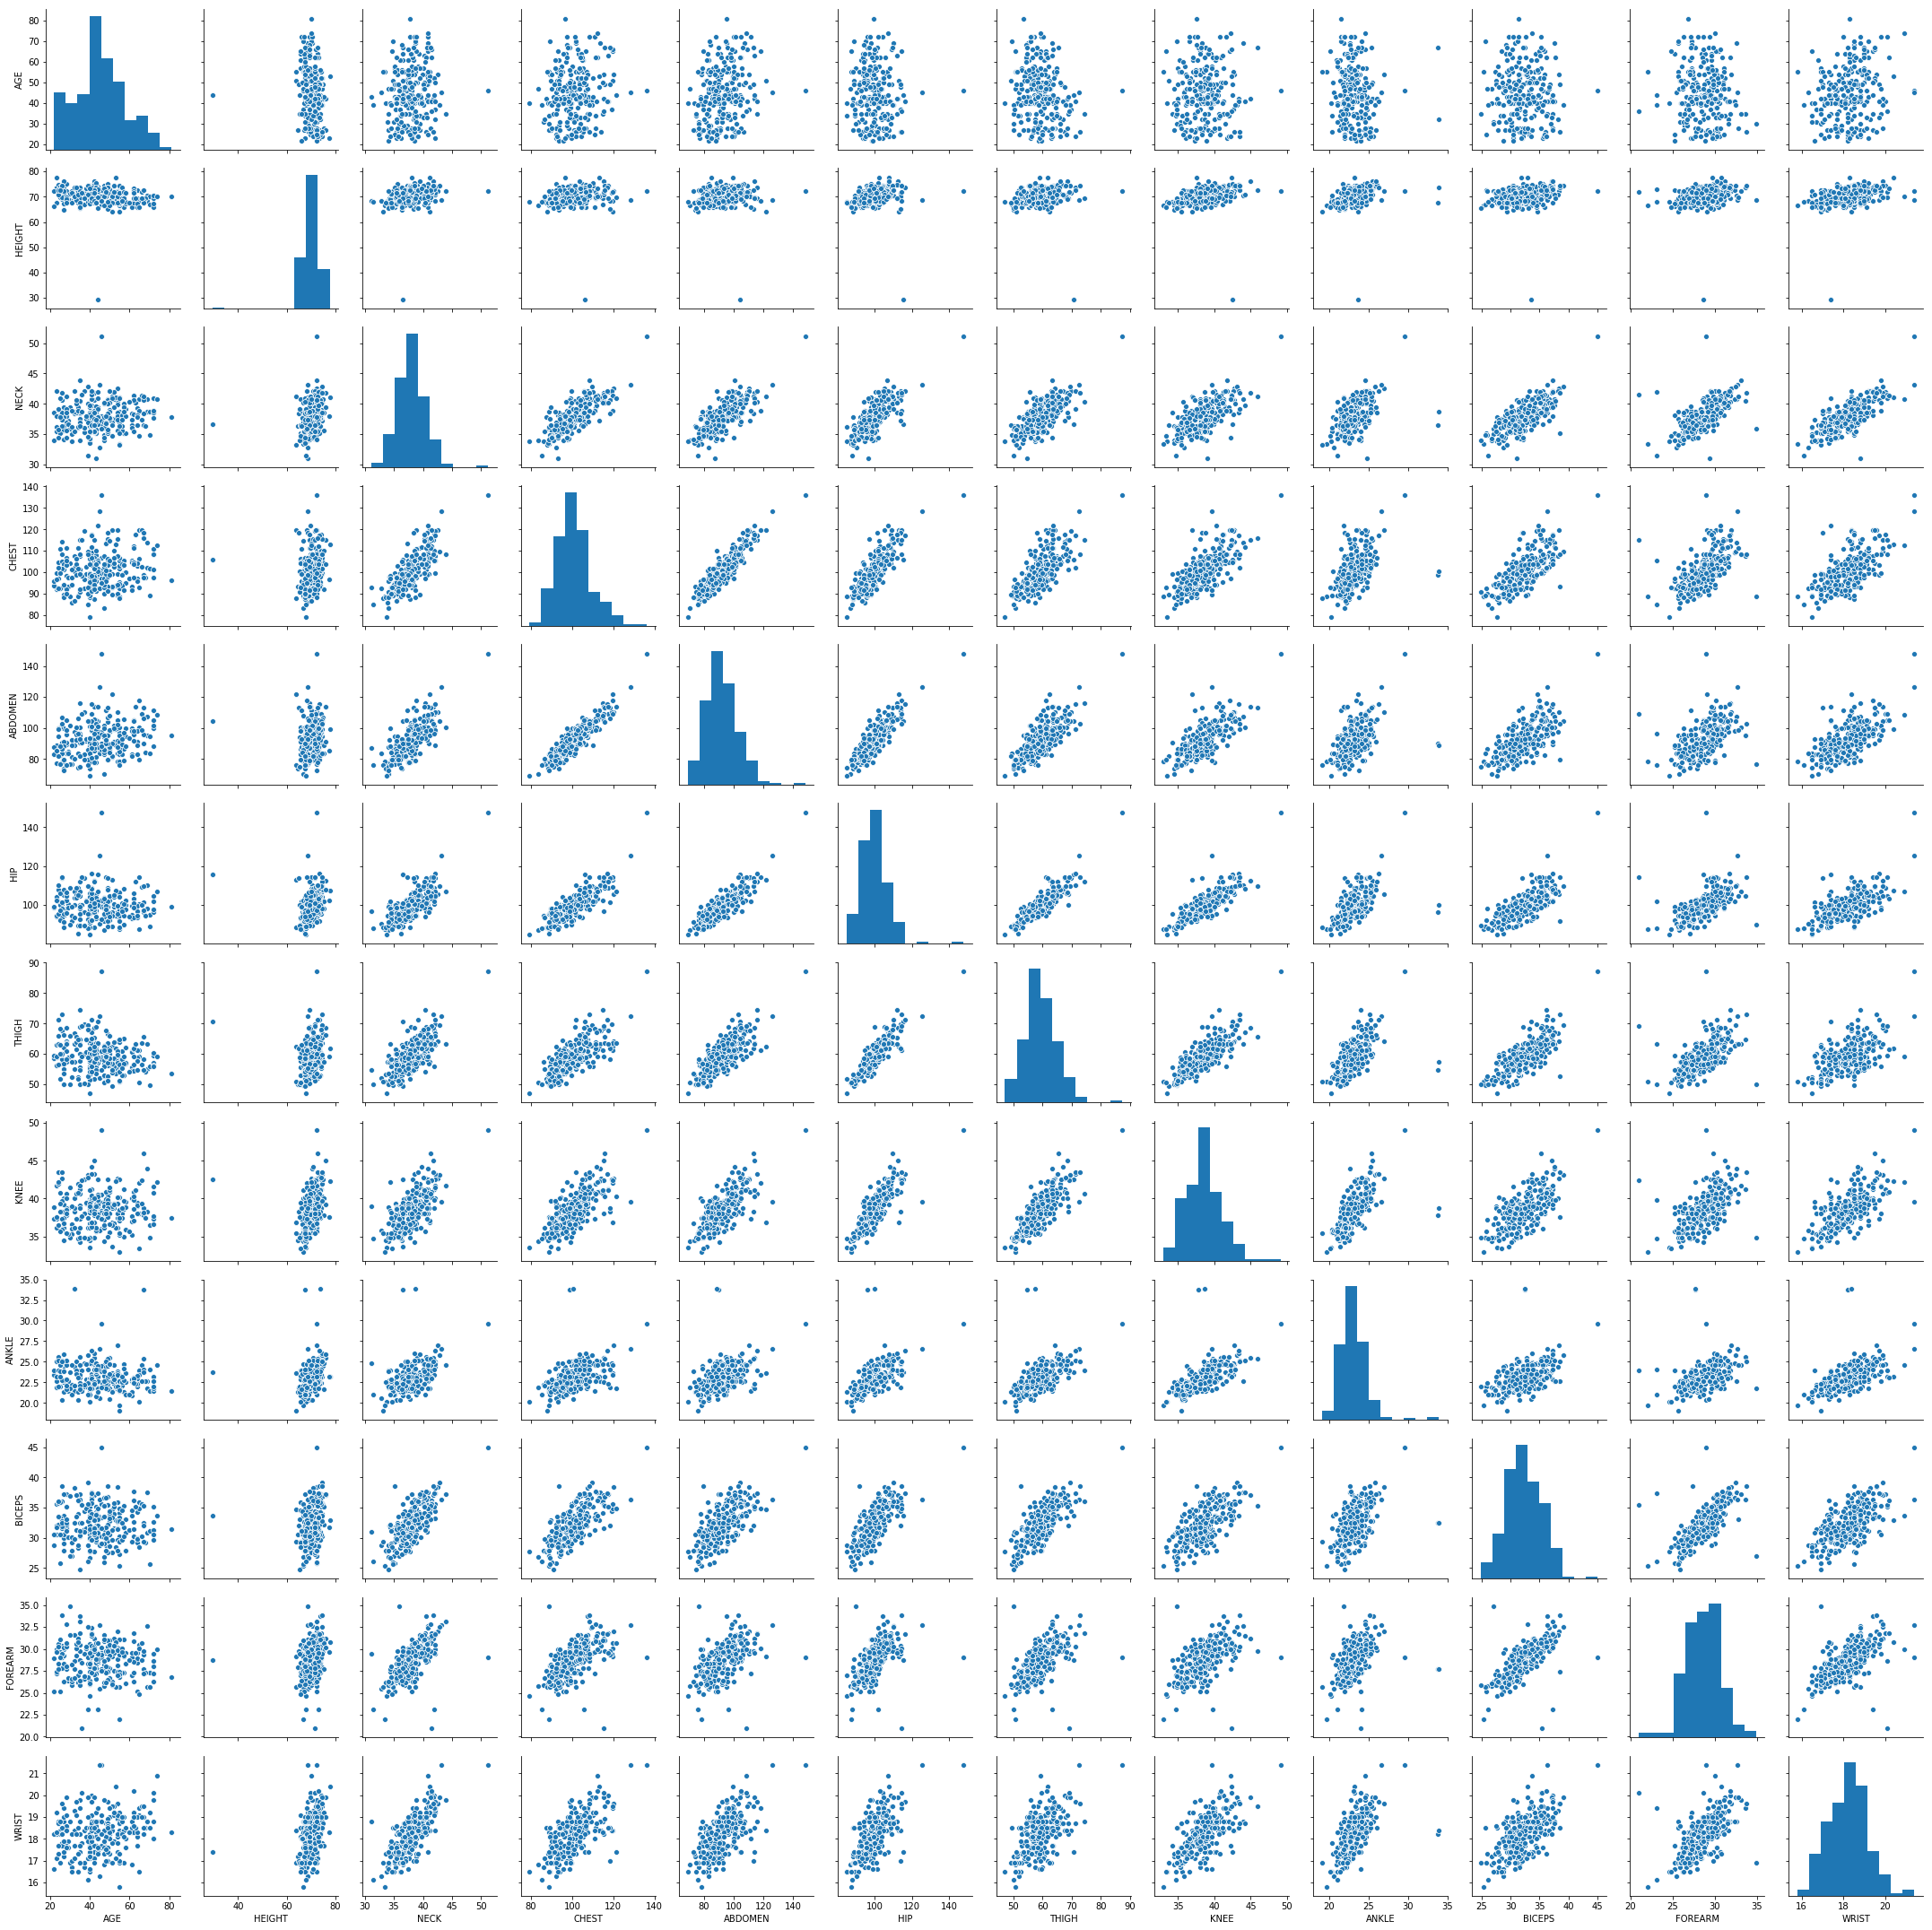

In [95]:
sns.pairplot(ds_health2_x)

In [96]:
ds_vif = pd.DataFrame()
ds_vif["variable"] = ds_health2_x.columns
#Pandas 내에서 사용할 수 있는 for 문 문법
ds_vif["VIF"] = [variance_inflation_factor(ds_health2_x.values,i) for i in range(ds_health2_x.shape[1])]
ds_vif.sort_values("VIF",inplace = True)
ds_vif.round(3)

,variable,VIF
0,AGE,26.222
8,ANKLE,345.387
9,BICEPS,387.366
1,HEIGHT,387.838
10,FOREARM,433.063
4,ABDOMEN,693.765
2,NECK,966.551
6,THIGH,1001.249
3,CHEST,1112.648
7,KNEE,1112.709


In [99]:
ds_vif = pd.DataFrame()
ds_vif["variable"] = ds_health2_x_const.columns
#Pandas 내에서 사용할 수 있는 for 문 문법
ds_vif["VIF"] = [variance_inflation_factor(ds_health2_x_const.values,i) for i in range(ds_health2_x_const.shape[1])]
ds_vif.sort_values("VIF",inplace = True)
ds_vif.round(3)

,variable,VIF
2,HEIGHT,1.330
9,ANKLE,1.844
1,AGE,2.154
11,FOREARM,2.192
12,WRIST,3.309
10,BICEPS,3.507
3,NECK,3.956
8,KNEE,4.312
7,THIGH,7.753
4,CHEST,7.883


## 다중 회귀분석 실습

In [128]:
ds_diabetes = pd.read_csv("./실습파일/DIABETES.csv", engine = "python")
ds_diabetes.head()
ds_diabetes["GENDER"] = [ds_diabetes["GENDER"][i]-1 for i in range(ds_diabetes.shape[0])]
# 442 rows × 11 columns
ds_diabetes.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,1,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,0,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,1,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,0,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,0,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [129]:
ds_diabetes_y = ds_diabetes["Y"]
ds_diabetes_x = ds_diabetes.drop("Y", axis = 1)
ds_diabetes_x_num = ds_diabetes_x.select_dtypes(exclude = 'object')
# 모두 numeric! 성별은 binary variable

In [130]:
ds_diabetes_x_const = sm.add_constant(ds_diabetes_x)
ds_diabetes_x_const.head()

,const,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,1.0,59,1,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,1.0,48,0,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,1.0,72,1,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,1.0,24,0,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,1.0,50,0,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


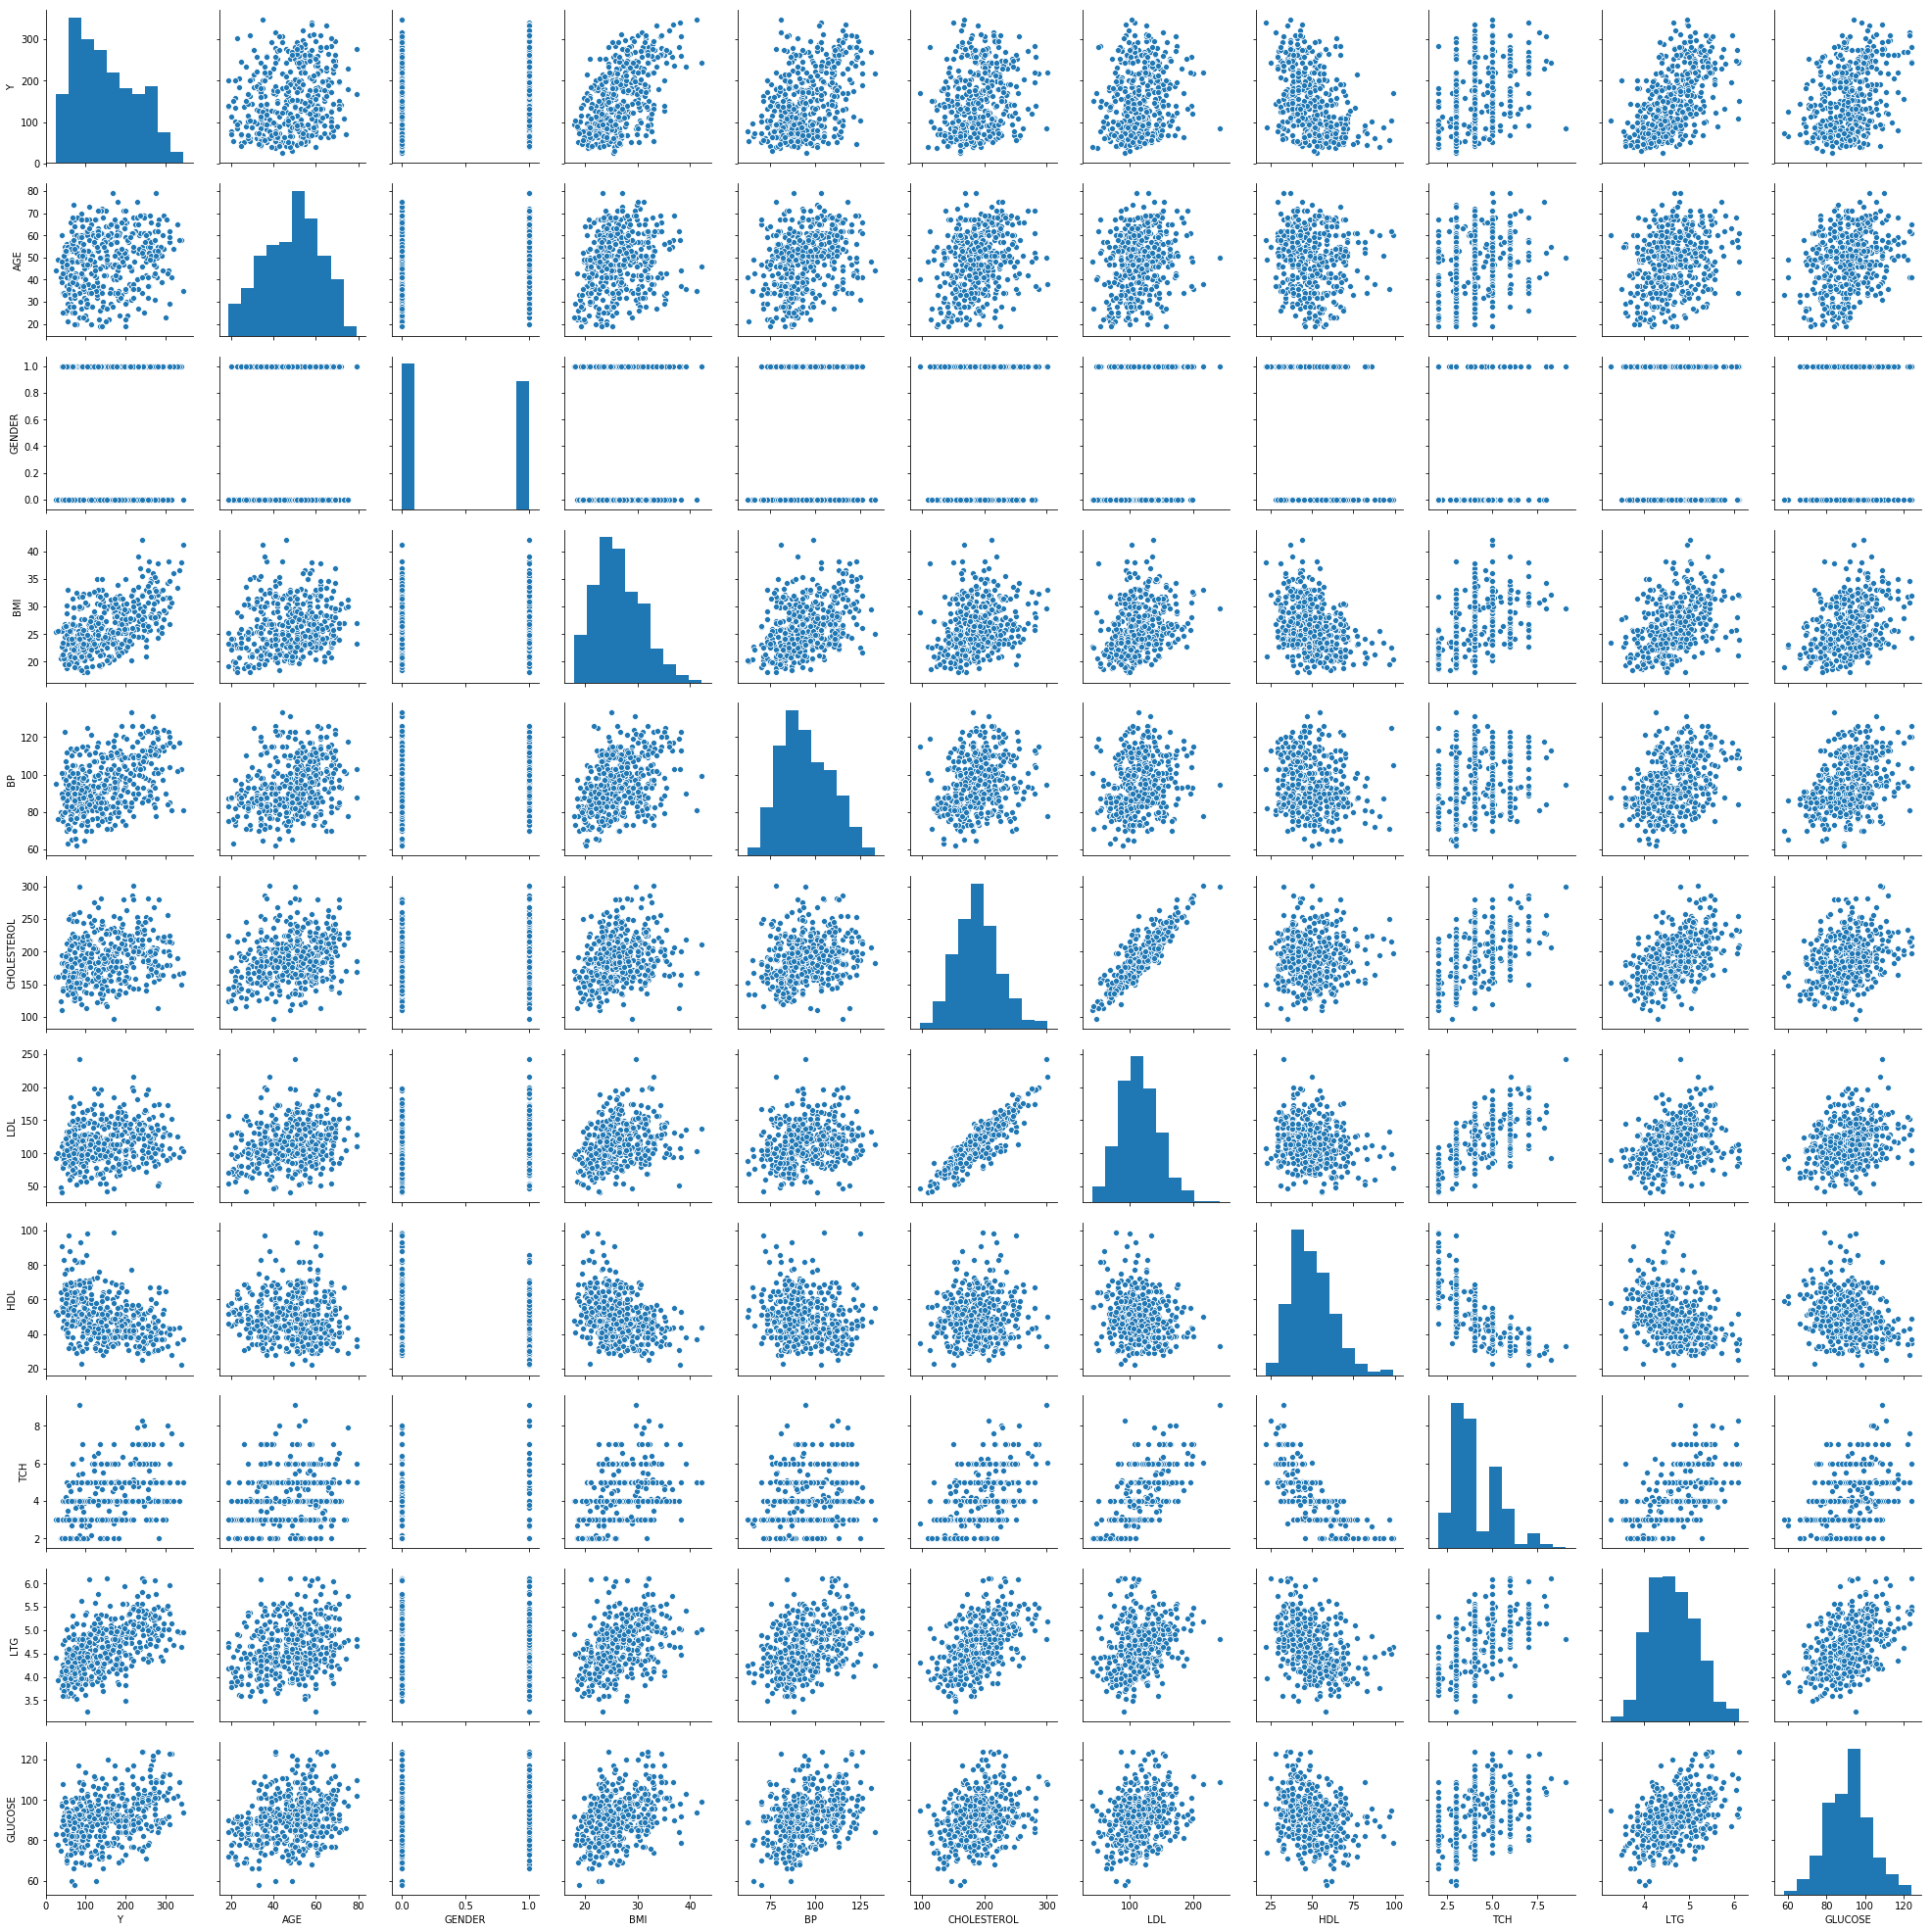

In [131]:
sns.pairplot(ds_diabetes)

In [132]:
ds_diabetes.corr().round(3)
# 목표변수 Y와 BMI,BP,TCH,LTG 정도가 상대적으로 강한 선형관계를 가짐.
# CHOLESTEROL-LDL TCH-LDL / TCH-HDL LTG-TCH 양,음의 강한 선형관계를 가짐 나중에 다중공선성 판단을 해봐야 할 것 같음.

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
Y,1.000,0.188,0.043,0.586,0.441,0.212,0.174,-0.395,0.430,0.566,0.382
AGE,0.188,1.000,0.174,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302
GENDER,0.043,0.174,1.000,0.088,0.241,0.035,0.143,-0.379,0.332,0.150,0.208
BMI,0.586,0.185,0.088,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389
BP,0.441,0.335,0.241,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390
CHOLESTEROL,0.212,0.260,0.035,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326
LDL,0.174,0.219,0.143,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291
HDL,-0.395,-0.075,-0.379,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274
TCH,0.430,0.204,0.332,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417
LTG,0.566,0.271,0.150,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465


In [133]:
regm = sm.OLS(ds_diabetes_y,ds_diabetes_x_const)
print(regm.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           3.83e-62
Time:                        15:30:18   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -357.4268     67.058     -5.330      

In [135]:
ds_vif = pd.DataFrame()
ds_vif["variable"] = ds_diabetes_x_const.columns
ds_vif["VIF"] = [variance_inflation_factor(ds_diabetes_x_const.values,i) for i in range(ds_diabetes_x_const.shape[1])]
ds_diabetes_x_const.values
ds_vif.sort_values("VIF",inplace = True)
ds_vif.round(3)

,variable,VIF
1,AGE,1.217
2,GENDER,1.278
4,BP,1.459
10,GLUCOSE,1.485
3,BMI,1.509
8,TCH,8.891
9,LTG,10.076
7,HDL,15.402
6,LDL,39.193
5,CHOLESTEROL,59.203


In [138]:
rfe_diabetes = RFE(estimator = LinearRegression(), n_features_to_select=5).fit(ds_diabetes_x,ds_diabetes_y)
selected_f = ds_diabetes_x.columns[rfe_diabetes.support_] # rfe_diabetes.support_임
removed_f = ds_diabetes_x.columns[~rfe_diabetes.support_]
print("Selected Variables: {}".format(selected_f))
print("removed Variables: {}".format(removed_f))

Selected Variables: Index(['GENDER', 'BMI', 'BP', 'TCH', 'LTG'], dtype='object')
removed Variables: Index(['AGE', 'CHOLESTEROL', 'LDL', 'HDL', 'GLUCOSE'], dtype='object')


In [147]:
ds_diabetes_x_rfe = sm.add_constant(ds_diabetes_x_const[selected_f])
# print(ds_diabetes_x_rfe)
regm_rfe = sm.OLS(ds_diabetes_y,ds_diabetes_x_rfe)
print(regm_rfe.fit().summary())
# ds_diabetes_x_cost = sm.add_constant(ds_diabetes_x_const[selected_f[3]='LDL' # 이거 안됨])

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     84.11
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           9.85e-62
Time:                        16:13:29   Log-Likelihood:                -2397.9
No. Observations:                 442   AIC:                             4808.
Df Residuals:                     436   BIC:                             4832.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -325.9425     27.158    -12.002      0.0

In [149]:
formula_m = smf.ols(formula = "Y~GENDER+BMI+BP+HDL+LTG",data=ds_diabetes)
formula_result = formula_m.fit()
print(formula_result.summary())F

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     90.26
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           4.75e-65
Time:                        16:15:56   Log-Likelihood:                -2390.1
No. Observations:                 442   AIC:                             4792.
Df Residuals:                     436   BIC:                             4817.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -240.1591     34.316     -6.998      0.0